## CS 2064: Jake Fortuna

### Data Science Research questions
1. What is the percent change of the top 5 ranked Crypto Currency's?
2. What is the hottest temperature ever recorded on earth?
3. How does the average time to complete a video game vary from 2004-2008?

### Sources
- Cryptocurrency API: https://api.coinlore.net/api/tickers/
- Highest Temperature Recorded on Earth: https://en.wikipedia.org/wiki/Highest_temperature_recorded_on_Earth
- Corgis Video Game Data: https://corgis-edu.github.io/corgis/datasets/json/video_games/video_games.json

In [1]:
'''Imports and Utility Functions'''
# In this cell, I import all of the necessary modules for the remaining cells
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

In [189]:
''' Public API: your findings '''
# In this cell I use a public api to answer a question about the top 5 cryptocurrencies 
first_url = 'https://api.coinlore.net/api/tickers/'
first_response = requests.get(first_url)
first_json = first_response.json()
top_5_names = []
day_difference = {}

for i in range(1, 6):
    for coin in firstJson['data']:
        if coin['rank'] == i:
            top_5_names.append(coin['name'])
            day_difference[coin['name']] = coin['percent_change_24h']


print('24 Hour Rate Changes for the top 5 current Cryptocurrencies\n')
count = 1
for name in top_5_names:
    print(count, name, day_difference[name])
    count += 1

24 Hour Rate Changes for the top 5 current Cryptocurrencies

1 Bitcoin 5.69
2 Ethereum 2.48
3 Tether -0.05
4 Binance Coin -0.50
5 USD Coin -0.05


In [184]:
''' Web Scraping: your findings '''
# In this cell I webscrape a quote from wikipedia about the highest temperature ever recorded on Earth
secondURL = 'https://en.wikipedia.org/wiki/Highest_temperature_recorded_on_Earth'
secondResponse = requests.get(secondURL)
html = secondResponse.text
soup = bs(html, 'html.parser')
article = soup.find(id='mw-content-text')
temperature = str(article.find_all('p')[5])
text = temperature[3:232]
print(text)

In the early 21st century, prior recordings for the highest temperature on Earth were investigated as probable misreadings. From 1922 until 2012, the WMO record for the highest official temperature on Earth was 57.8 °C (136.0 °F)


In [187]:
''' Direct Download: your findings '''
# In this cell I use a direct download to answer a question about video games from 2004-2008
third_url = 'https://corgis-edu.github.io/corgis/datasets/json/video_games/video_games.json'
third_response = requests.get(third_url)
third_json = third_response.json()
years = [2004, 2005, 2006, 2007, 2008]
time_years = {}
count_years = {}

for year in years:
    time_years[year] = 0
    count_years[year] = 0
    
for game in third_json:
    for year in years:        
        if game['Release']['Year'] == year:
            time_years[year] += game['Length']['All PlayStyles']['Average']
            count_years[year] += 1

print('Time on average to complete a video game from each year (2004-2008)\n')
for year in years:
    print(year, (round(time_years[year]/count_years[year], 3)), 'hours')

Time on average to complete a video game from each year (2004-2008)

2004 8.025 hours
2005 11.588 hours
2006 14.997 hours
2007 13.803 hours
2008 13.614 hours


Text(0, 0.5, 'Hours')

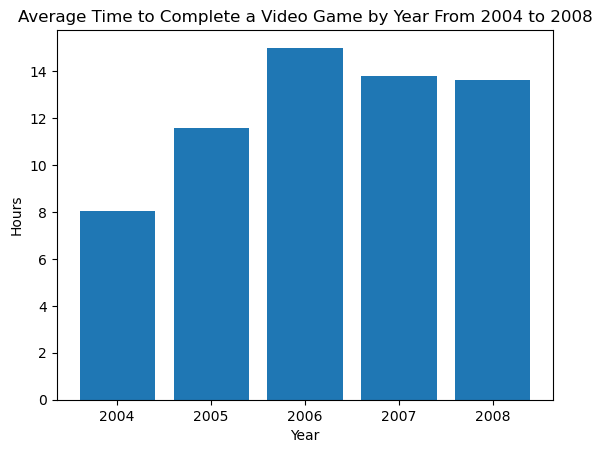

In [188]:
''' Visualization: '''
# In this cell I create a visualization about question 3
str_years = ['2004', '2005', '2006', '2007', '2008']
list_avg_time = []

for year in years:
    list_avg_time.append(round(time_years[year]/count_years[year], 3))
    
plt.bar(str_years, list_avg_time)
plt.title('Average Time to Complete a Video Game by Year From 2004 to 2008')
plt.xlabel('Year')
plt.ylabel('Hours')

**Visual Description:** 
The graph above represents the 'average time to complete a video game from 2004 to 2008'. The graph utilizes the video game data from corgis. More specifically, it uses the 'Length' data to determine how many hours it takes to complete a game in 'All PlayStyles'. The graph is a bar graph and I choose to use this type of graph because I think it does a good job of presenting the data visually to the viewer. The y axis of the graph represents the hours it takes, and the  x axis of the graph represents the year.

**Visual Discussion:** 
When intepretting the visual data, the first thing that I notice is a general upward trend of how long it takes to complete a game until 2006. This upward trend could reflect a change in preference of consumers of video games at the time. It could be possible that consumers demanded a more complete game that would take a longer period of time to finish. This change in demand is reflected in the bar graph as shown. The hours to complete going down after 2006 could represent developers finding the sweet spot of how long a game should take according to consumers.  